<a href="https://colab.research.google.com/github/tharun-229/_ADM/blob/main/assigment-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

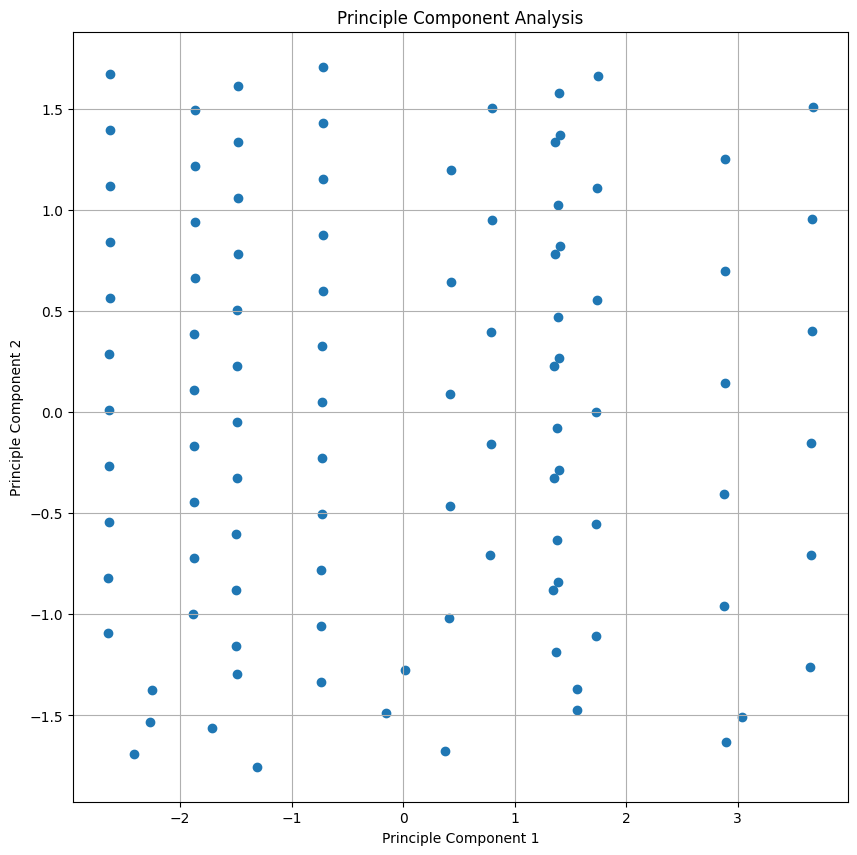

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# to read csv file
data=pd.read_csv("/content/employee_performance.csv")

#to standardize dataset
scaler = StandardScaler()
data_scaled=scaler.fit_transform(data)

#performing PCA
pca=PCA(n_components=2)
principle_components=pca.fit_transform(data_scaled)

#to covert in datafrane
df=pd.DataFrame(principle_components,columns=['PC1','PC2'])

#to plot scatter plot
plt.figure(figsize=(10,10))
plt.scatter(df['PC1'],df['PC2'])
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title("Principle Component Analysis")
plt.grid()
plt.show()




Apply PCA to reduce the high-dimensional performance metrics to 2 components

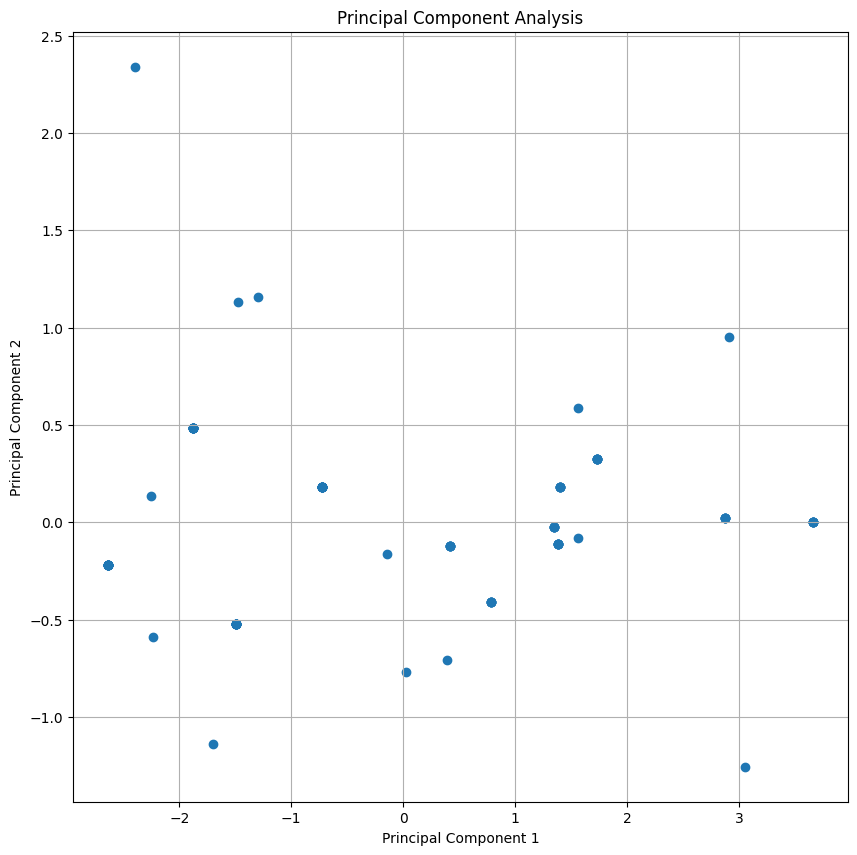

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/employee_performance.csv")

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data.drop(columns=['Employee ID']))

pca = PCA(n_components=2)
principle_components = pca.fit_transform(data_scaled)

df = pd.DataFrame(principle_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 10))
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal Component Analysis")
plt.grid(True)
plt.show()


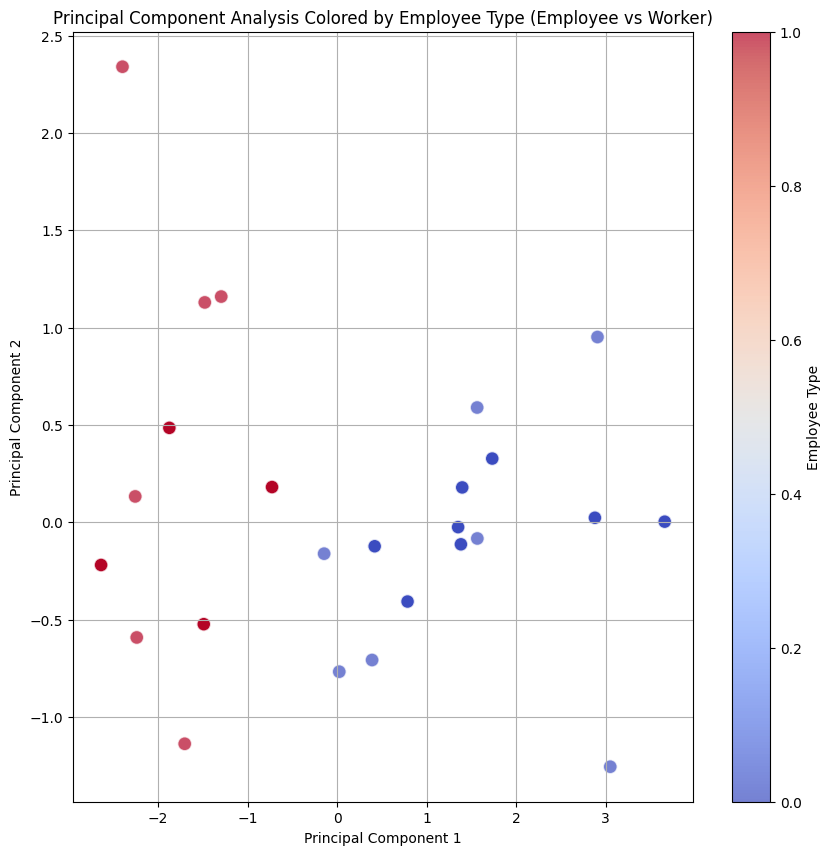

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/employee_performance.csv")

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data.drop(columns=['Employee ID']))

pca = PCA(n_components=2)
principle_components = pca.fit_transform(data_scaled)

df = pd.DataFrame(principle_components, columns=['PC1', 'PC2'])

data['Employee Type'] = ['Employee' if x >= 5 else 'Worker' for x in data['Experience (Years)']]

color_map = {'Employee': 0, 'Worker': 1}
df['Employee Type Color'] = data['Employee Type'].map(color_map)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['Employee Type Color'], cmap='coolwarm', alpha=0.7, edgecolors='w', s=100)

plt.colorbar(scatter, label='Employee Type')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal Component Analysis Colored by Employee Type (Employee vs Worker)")
plt.grid(True)
plt.show()


Colour Based

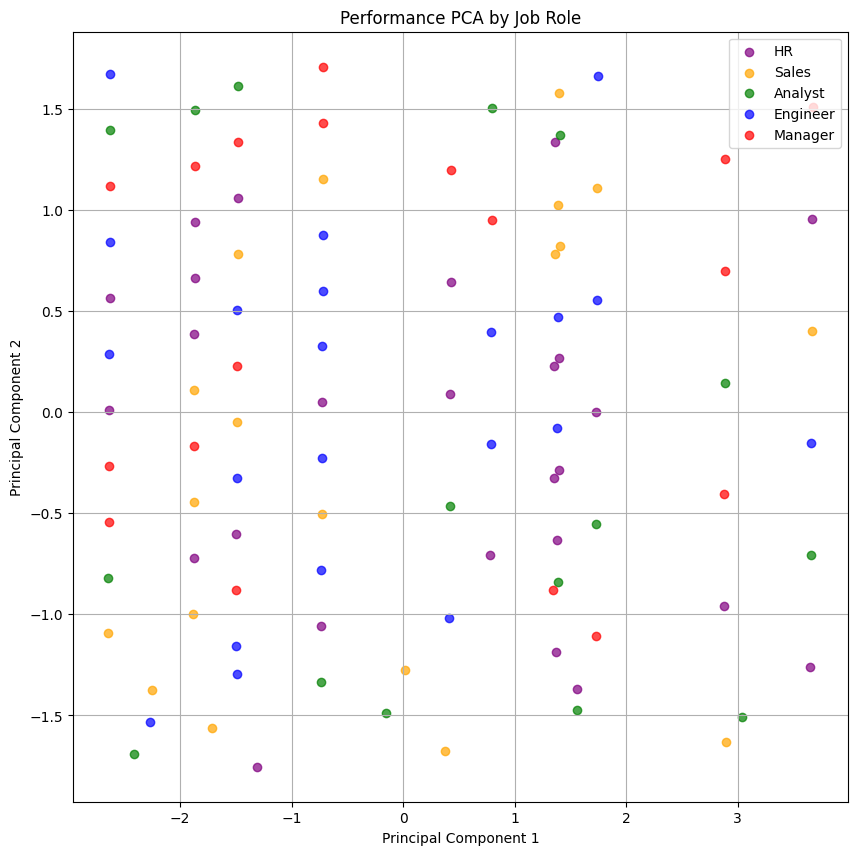

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv("/content/employee_performance.csv")

np.random.seed(42)
job_roles = ['Manager', 'Engineer', 'Analyst', 'HR', 'Sales']
data['Job Role'] = np.random.choice(job_roles, size=len(data))

data_numeric = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df['Job Role'] = data['Job Role']

plt.figure(figsize=(10, 10))
colors = {'Manager': 'red', 'Engineer': 'blue', 'Analyst': 'green', 'HR': 'purple', 'Sales': 'orange'}
for role in df['Job Role'].unique():
    subset = df[df['Job Role'] == role]
    plt.scatter(subset['PC1'], subset['PC2'], label=role, alpha=0.7, color=colors[role])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Performance PCA by Job Role')
plt.legend()
plt.grid()
plt.show()
